In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Kraus, SuperOp, random_quantum_channel, PTM, Choi, Chi
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [2]:
## random quantum channel in Stinespring form
from qiskit.quantum_info import random_quantum_channel
random_quantum_channel(2, 2)

Stinespring([[ 0.06885476+0.3910152j ,  0.20438933+0.05910322j],
             [ 0.31245599+0.02311884j,  0.16757821-0.21559717j],
             [-0.05263711-0.00905652j, -0.1945255 +0.53793483j],
             [ 0.02102957-0.49189433j,  0.16111173-0.21351109j],
             [ 0.29642876+0.22348274j, -0.10087805-0.28069541j],
             [-0.34187756-0.00845965j, -0.20053018-0.31480756j],
             [ 0.03999834+0.42614222j, -0.13431833-0.1325844j ],
             [-0.24527358+0.02872948j,  0.46028553-0.07512615j]],
            input_dims=(2,), output_dims=(2,))

In [3]:
rqc = PTM(random_quantum_channel(2, 2))
print('num_qubits: ', rqc.num_qubits)
rqc

num_qubits:  1


PTM([[ 1.00000000e+00+8.74076374e-18j,  5.89805982e-17-6.93889390e-18j,
       3.46944695e-17+0.00000000e+00j, -1.11022302e-16-7.82562180e-18j],
     [-2.86593783e-01+8.67361738e-19j,  1.47855987e-01+0.00000000e+00j,
      -1.62431989e-01+0.00000000e+00j, -3.17758765e-01+8.67361738e-19j],
     [ 1.47424935e-01+0.00000000e+00j, -1.62548064e-01+0.00000000e+00j,
       1.31079590e-01+0.00000000e+00j, -1.30989106e-01+0.00000000e+00j],
     [-6.63227365e-01-1.03564694e-17j,  2.69536560e-02+6.93889390e-18j,
       1.06805607e-01+0.00000000e+00j, -4.01931013e-02+2.94093626e-18j]],
    input_dims=(2,), output_dims=(2,))

In [4]:
rqc.compose(rqc)

PTM([[ 1.00000000e+00+2.46603379e-17j,  5.90692569e-17-8.17578003e-18j,
       1.78040661e-17+2.91278054e-19j, -1.29846171e-16-5.30619143e-18j],
     [-1.42168607e-01+1.20615869e-18j,  3.96996378e-02-1.92871932e-19j,
      -7.92464783e-02+9.26390967e-20j, -1.29340044e-02+1.40164895e-18j],
     [ 3.00210160e-01+2.50420322e-18j, -4.88710735e-02-1.93188549e-18j,
       2.95944934e-02+0.00000000e+00j,  3.97459322e-02-1.67991037e-18j],
     [-6.28549141e-01-1.96530991e-17j, -1.44591363e-02+5.42839465e-18j,
       5.32905065e-03-8.12989857e-19j, -2.09396460e-02+2.77224004e-18j]],
    input_dims=(2,), output_dims=(2,))

In [5]:
rqc.power(4)
rqc.adjoint()
rqc.is_unitary()
rqc.is_cptp() # cp, tp, unitary

True

In [6]:
from qiskit.quantum_info import Kraus
rqc_kraus = Kraus(random_quantum_channel(2, 2))
rqc_kraus

Kraus([[[-0.43707631-0.14516188j, -0.034397  +0.27381402j],
        [ 0.24785798-0.06810455j, -0.08515486-0.18925227j]],

       [[ 0.0379263 -0.00665024j, -0.16190967+0.02613112j],
        [-0.25128186+0.00193994j,  0.19069565+0.07950482j]],

       [[ 0.13031368+0.247972j  ,  0.68426905+0.12155623j],
        [ 0.10067869+0.53356301j, -0.28467422+0.14111131j]],

       [[ 0.51606571+0.00561311j, -0.15976635+0.26480532j],
        [ 0.06668372+0.11442053j, -0.30541943+0.19573325j]]],
      input_dims=(2,), output_dims=(2,))

In [7]:
from qiskit.quantum_info import SuperOp
rqc_superop = SuperOp(random_quantum_channel(2, 2))
rqc_superop

SuperOp([[ 0.52026977-9.66067536e-18j,  0.10063323-1.76811433e-01j,
           0.10063323+1.76811433e-01j,  0.32567927+7.52895145e-19j],
         [ 0.03864309-4.79708656e-02j,  0.31098596-5.40737904e-02j,
           0.08899708-1.02966869e-01j,  0.34797041+2.02380933e-01j],
         [ 0.03864309+4.79708656e-02j,  0.08899708+1.02966869e-01j,
           0.31098596+5.40737904e-02j,  0.34797041-2.02380933e-01j],
         [ 0.47973023+1.13154920e-21j, -0.10063323+1.76811433e-01j,
          -0.10063323-1.76811433e-01j,  0.67432073-1.06008950e-17j]],
        input_dims=(2,), output_dims=(2,))

In [8]:
from qiskit.quantum_info import Choi

rqc_choi = Choi(random_quantum_channel(2, 2))
rqc_choi

Choi([[ 0.62624433+1.58476117e-17j,  0.08534607-4.01810435e-02j,
        0.23678685+3.01178015e-02j,  0.12303162-5.61603539e-02j],
      [ 0.08534607+4.01810435e-02j,  0.37375567-6.10074507e-18j,
        0.16896483-3.21122870e-02j, -0.23678685-3.01178015e-02j],
      [ 0.23678685-3.01178015e-02j,  0.16896483+3.21122870e-02j,
        0.54821592+2.32410142e-18j,  0.15737015-1.64499647e-01j],
      [ 0.12303162+5.61603539e-02j, -0.23678685+3.01178015e-02j,
        0.15737015+1.64499647e-01j,  0.45178408-3.47516213e-18j]],
     input_dims=(2,), output_dims=(2,))

In [9]:
from qiskit.quantum_info import Chi
rqc_chi = Chi(random_quantum_channel(2, 2))
rqc_chi

Chi([[ 0.79836415+6.93889390e-18j, -0.03488378-7.09711601e-02j,
      -0.0518835 +4.87656411e-01j,  0.02820931-1.12935664e-01j],
     [-0.03488378+7.09711601e-02j,  0.41181799-6.93889390e-18j,
      -0.05601561-2.82093077e-02j, -0.01635159-5.18835015e-02j],
     [-0.0518835 -4.87656411e-01j, -0.05601561+2.82093077e-02j,
       0.5439036 +6.93889390e-18j,  0.09223869+3.48837838e-02j],
     [ 0.02820931+1.12935664e-01j, -0.01635159+5.18835015e-02j,
       0.09223869-3.48837838e-02j,  0.24591426-2.08166817e-17j]],
    input_dims=(2,), output_dims=(2,))

In [10]:
from qiskit.quantum_info import average_gate_fidelity
average_gate_fidelity(random_quantum_channel(2, 2))

0.5675002373830127

In [11]:
from qiskit.quantum_info import process_fidelity
process_fidelity(random_quantum_channel(2, 2), random_quantum_channel(2, 2))

0.40233711255718513

In [12]:
from qiskit.quantum_info import gate_error
gate_error(random_quantum_channel(2, 2))

0.5587452460410387

In [13]:
from qiskit.quantum_info import diamond_norm
diamond_norm(random_quantum_channel(2, 2)-random_quantum_channel(2, 2))

1.203391603312065

In [14]:
# Construct a 1-qubit bit-flip and phase-flip errors
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
print(bit_flip)
print(phase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [15]:
# Compose two bit-flip and phase-flip errors
bitphase_flip = bit_flip.compose(phase_flip)
print(bitphase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘
  P(1) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ I ├
   └───┘└───┘
  P(2) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ Z ├
   └───┘└───┘
  P(3) = 0.9025, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ I ├
   └───┘└───┘


In [16]:
# Tensor product two bit-flip and phase-flip errors with
# bit-flip on qubit-0, phase-flip on qubit-1
error2 = phase_flip.tensor(bit_flip)
print(error2)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(1) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(2) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(3) = 0.9025, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘


In [17]:
# Convert to Kraus operator
bit_flip_kraus = Kraus(bit_flip)
print(bit_flip_kraus)

Kraus([[[ 9.74679434e-01+0.j,  0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  9.74679434e-01+0.j]],

       [[ 0.00000000e+00+0.j,  2.23606798e-01+0.j],
        [ 2.23606798e-01+0.j, -4.96506831e-17+0.j]]],
      input_dims=(2,), output_dims=(2,))


In [18]:
# Convert to Superoperator
phase_flip_sop = SuperOp(phase_flip)
print(phase_flip_sop)

SuperOp([[1. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0.9+0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0.9+0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0. +0.j, 1. +0.j]],
        input_dims=(2,), output_dims=(2,))


In [19]:
# Convert back to a quantum error
print(QuantumError(bit_flip_kraus))
 
# Check conversion is equivalent to original error
QuantumError(bit_flip_kraus) == bit_flip

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───────┐
q: ┤ kraus ├
   └───────┘


True

In [20]:
# Measurement misassignment probabilities
p0given1 = 0.1
p1given0 = 0.05
 
ReadoutError([[1 - p1given0, p1given0], [p0given1, 1 - p0given1]])

ReadoutError([[0.95 0.05]
 [0.1  0.9 ]])

In [21]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)
 
# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


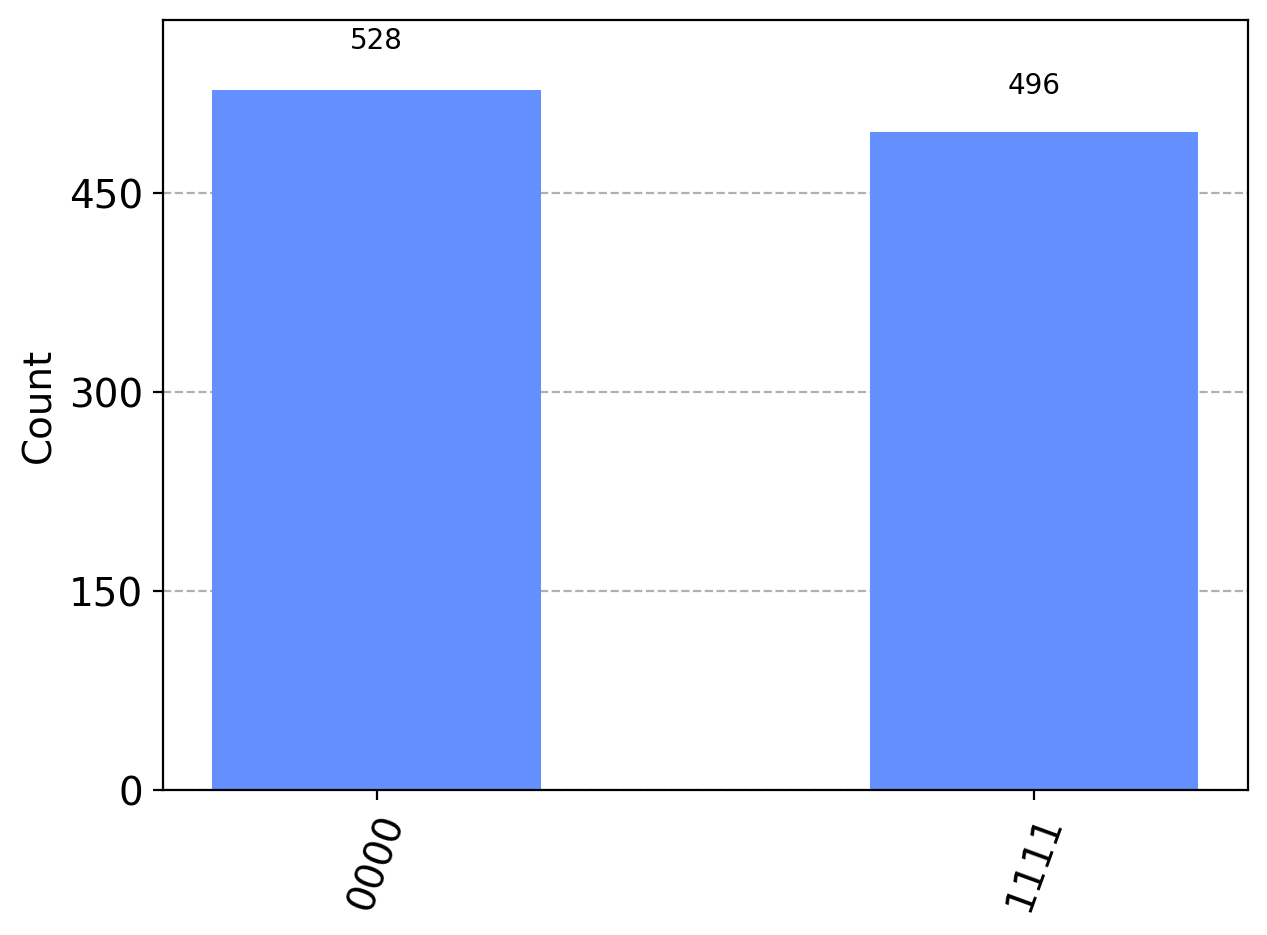

In [22]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [23]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
 
# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
 
# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
 
print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['measure', 'reset', 'u3', 'cx', 'u1', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


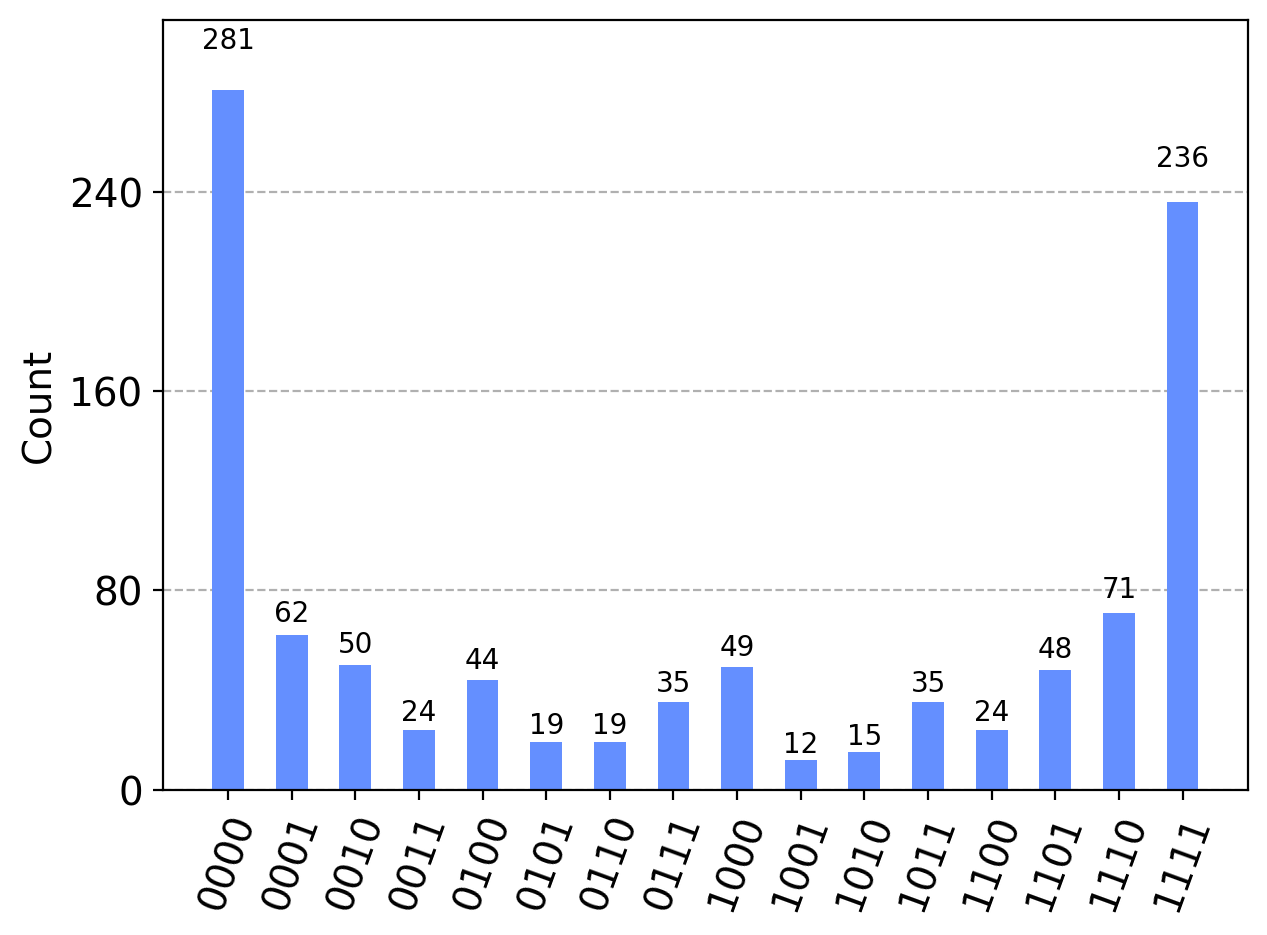

In [24]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(circ)
 
# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_bit_flip)